In [70]:
import pandas as pd
import numpy as np
import seaborn as sns

In [71]:
df=pd.read_csv("/Users/aryangalande/Desktop/DSBDAL/ASGMT02-DW02/StudentsPerformance.csv")

In [72]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72.0,74.0
1,female,group C,some college,standard,completed,69,90.0,88.0
2,female,group B,master's degree,standard,none,90,95.0,93.0
3,male,group A,associate's degree,free/reduced,none,47,57.0,44.0
4,male,group C,some college,standard,none,76,78.0,75.0
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99.0,95.0
996,male,group C,high school,free/reduced,none,62,55.0,55.0
997,female,group C,high school,free/reduced,completed,59,71.0,65.0
998,female,group D,some college,standard,completed,68,78.0,77.0


In [73]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     8
reading score                  6
writing score                  9
dtype: int64

In [74]:
df.dtypes

gender                          object
race/ethnicity                  object
parental level of education     object
lunch                           object
test preparation course         object
math score                      object
reading score                  float64
writing score                  float64
dtype: object

In [75]:
df["math score"].replace("?",np.nan,inplace=True)

In [76]:
df= df.astype({"math score":float})

In [77]:
df["math score"].fillna(df["math score"].median(),inplace=True)

In [78]:
df["reading score"].fillna(df["reading score"].median(),inplace=True)

In [79]:
df["writing score"].fillna(df["writing score"].median(),inplace=True)

In [80]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72.0,72.0,74.0
1,female,group C,some college,standard,completed,69.0,90.0,88.0
2,female,group B,master's degree,standard,none,90.0,95.0,93.0
3,male,group A,associate's degree,free/reduced,none,47.0,57.0,44.0
4,male,group C,some college,standard,none,76.0,78.0,75.0
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88.0,99.0,95.0
996,male,group C,high school,free/reduced,none,62.0,55.0,55.0
997,female,group C,high school,free/reduced,completed,59.0,71.0,65.0
998,female,group D,some college,standard,completed,68.0,78.0,77.0


In [81]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

<Axes: xlabel='math score', ylabel='Count'>

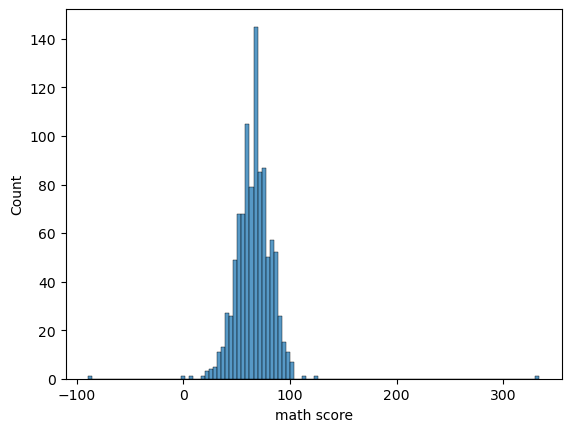

In [82]:
sns.histplot(df["math score"])

<Axes: xlabel='reading score', ylabel='Count'>

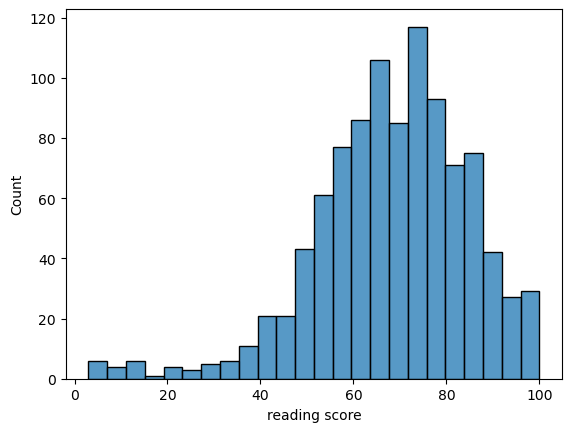

In [83]:
sns.histplot(df["reading score"])

<Axes: xlabel='writing score', ylabel='Count'>

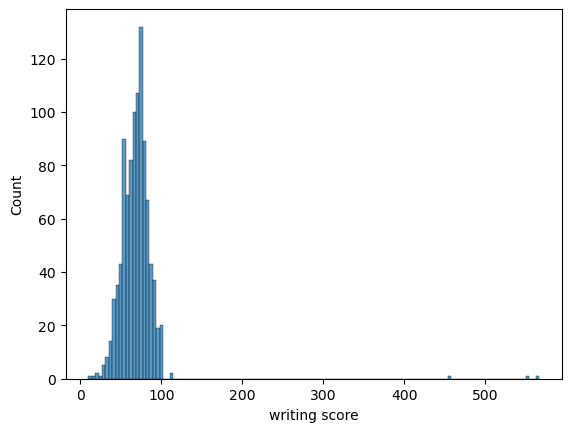

In [84]:
sns.histplot(df["writing score"])

<Axes: >

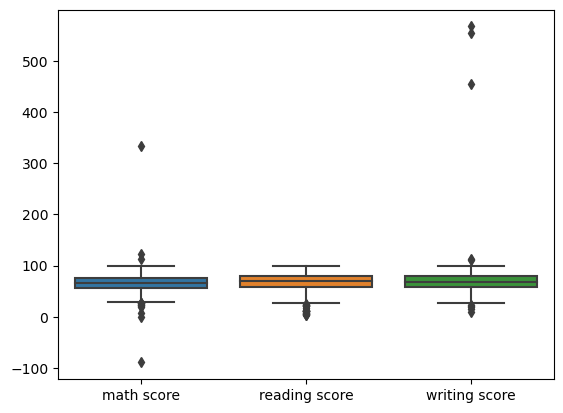

In [85]:
sns.boxplot(data=df)

In [86]:
def remove_outliers(name:str):
    global df
    q3,q1=np.percentile(df[name],[75,25])
    iqr=q3-q1
    df=df[(df[name]>=q1-(iqr*1.5))&(df[name]<=q3+(iqr*1.5))]

In [87]:
remove_outliers("math score")

<Axes: xlabel='math score', ylabel='Count'>

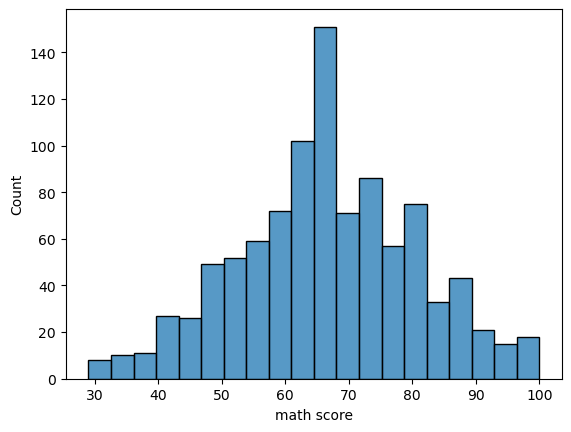

In [88]:
sns.histplot(df["math score"])

In [89]:
remove_outliers("reading score")

<Axes: xlabel='reading score', ylabel='Count'>

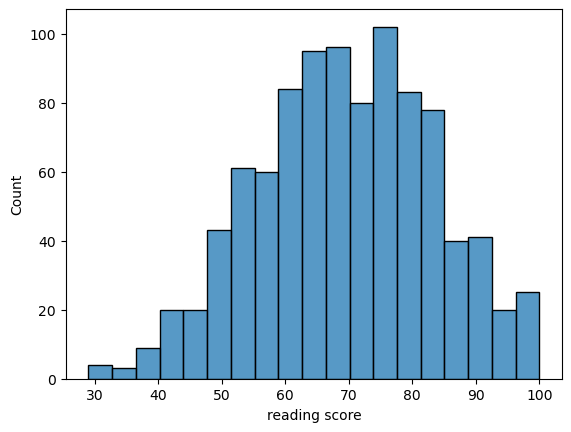

In [90]:
sns.histplot(df["reading score"])

In [91]:
remove_outliers("writing score")

<Axes: xlabel='writing score', ylabel='Count'>

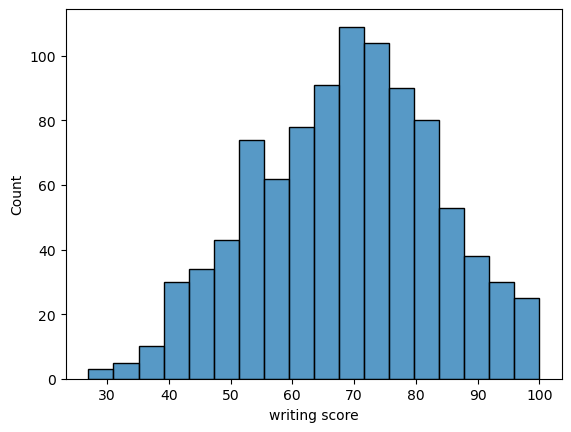

In [92]:
sns.histplot(df["writing score"])

<Axes: >

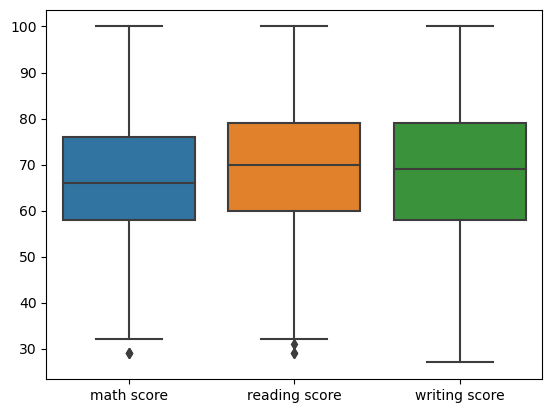

In [93]:
sns.boxplot(data=df)